In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
folder_path = r'C:\Users\eduma\OneDrive\Escritorio\Folders_Links\Formation\CTT COLLEGUE Programming Bootcamp Sept2023\StratThink_HDipData&AI_Sept23_HCI\CA 2 - GitLab\ca2stratthinking\15_12-2023_15_12-2023'
# Initialize an empty list to store DataFrames
dataframes = []

# Loop through all files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(folder_path, file_name)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        dataframes.append(df)

# Concatenating all the DataFrames in the list into one
targeted_merged_df = pd.concat(dataframes, ignore_index=True)

#Saving the merged DataFrame to a new CSV file
output_file_path = r'C:\Users\eduma\OneDrive\Escritorio\Folders_Links\Formation\CTT COLLEGUE Programming Bootcamp Sept2023\StratThink_HDipData&AI_Sept23_HCI\CA 2 - GitLab\ca2stratthinking\targeted_merged_dataset.csv'
targeted_merged_df.to_csv(output_file_path, index=False)

print(f"The merged dataset has been saved to {output_file_path}")

The merged dataset has been saved to C:\Users\eduma\OneDrive\Escritorio\Folders_Links\Formation\CTT COLLEGUE Programming Bootcamp Sept2023\StratThink_HDipData&AI_Sept23_HCI\CA 2 - GitLab\ca2stratthinking\targeted_merged_dataset.csv


In [3]:
df= pd.read_csv("targeted_merged_dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       105 non-null    object
 1   Source        105 non-null    object
 2   Destination   105 non-null    object
 3   Duration      105 non-null    object
 4   Total stops   105 non-null    object
 5   Price         105 non-null    object
 6   Date          105 non-null    object
 7   Date scraped  105 non-null    object
dtypes: object(8)
memory usage: 6.7+ KB


In [5]:
df.describe(include='all')

Airline Source Destination Duration Total stops Price        Date  \
count      105    105         105      105         105   105         105   
unique      30      4           4       59           4    92           1   
top     Iberia    DUB         DUB   2h 35m      1 stop  €253  15/12/2023   
freq        18     60          45        6          67     3         105   

       Date scraped  
count           105  
unique            2  
top      15/12/2023  
freq            104

In [6]:
df.head()

Airline Source Destination Duration Total stops Price  \
0              Vueling    DUB         IBZ   6h 20m      1 stop  €127   
1              Vueling    DUB         IBZ  17h 45m      1 stop   €84   
2  Aer Lingus, Vueling    DUB         IBZ   5h 05m      1 stop  €276   
3               Iberia    DUB         IBZ  12h 30m      1 stop  €140   
4              Vueling    DUB         IBZ  20h 45m      1 stop   €84   

         Date Date scraped  
0  15/12/2023   15/12/2023  
1  15/12/2023   15/12/2023  
2  15/12/2023   15/12/2023  
3  15/12/2023   15/12/2023  
4  15/12/2023   15/12/2023

In [7]:
df['Airline'].value_counts()

Iberia                          18
British Airways                 16
Vueling                         13
Aer Lingus                       5
Vueling, Air Europa              5
Multiple Airlines                4
Vueling, Iberia                  4
Iberia Express                   4
Aer Lingus, Vueling              3
Vueling, Aer Lingus              3
Aer Lingus, Air Europa           3
Iberia, British Airways          3
Vueling, Iberia Express          2
Binter Canarias, Aer Lingus      2
Iberia, Iberia Express           2
Transavia France, Iberia         2
Transavia France, Vueling        2
Vueling, Binter Canarias         2
Canaryfly, Aer Lingus            1
Air Europa, Aer Lingus           1
Air Europa, Transavia France     1
Air France                       1
Aer Lingus, Binter Canarias      1
Vueling, Transavia France        1
Iberia Express, Air Europa       1
Iberia, Air Europa               1
Transavia France, Air Europa     1
Lufthansa                        1
KLM                 

In [8]:
df['Source'].value_counts()

DUB    60
IBZ    15
MAD    15
TFN    15
Name: Source, dtype: int64

In [9]:
df['Total stops'].value_counts()

1 stop     67
2 stops    23
direct     14
3 stops     1
Name: Total stops, dtype: int64

In [10]:
# Replace 'direct' with 0 in 'Total stops' and convert to int, handling NaN values
df['Total stops'] = df['Total stops'].replace('direct', '0').str.extract('(\d+)')[0].fillna(0).astype(int)

# Remove the '€' sign from the 'Price' column and convert to integer, handling NaN and empty strings
df['Price'] = df['Price'].replace({'€': '', ',': '', ' ': ''}, regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0).astype(int)

# Convert the 'Duration' column to minutes
def duration_to_minutes(duration_str):
    if pd.isnull(duration_str):
        return 0
    parts = duration_str.split(' ')
    minutes = 0
    for part in parts:
        if 'h' in part:
            minutes += int(part.replace('h', '')) * 60
        elif 'm' in part:
            minutes += int(part.replace('m', ''))
    return minutes

df['Duration'] = df['Duration'].apply(duration_to_minutes)

# Display the first few rows to confirm the changes
df.head()

Airline Source Destination  Duration  Total stops  Price  \
0              Vueling    DUB         IBZ       380            1    127   
1              Vueling    DUB         IBZ      1065            1     84   
2  Aer Lingus, Vueling    DUB         IBZ       305            1    276   
3               Iberia    DUB         IBZ       750            1    140   
4              Vueling    DUB         IBZ      1245            1     84   

         Date Date scraped  
0  15/12/2023   15/12/2023  
1  15/12/2023   15/12/2023  
2  15/12/2023   15/12/2023  
3  15/12/2023   15/12/2023  
4  15/12/2023   15/12/2023

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       105 non-null    object
 1   Source        105 non-null    object
 2   Destination   105 non-null    object
 3   Duration      105 non-null    int64 
 4   Total stops   105 non-null    int32 
 5   Price         105 non-null    int32 
 6   Date          105 non-null    object
 7   Date scraped  105 non-null    object
dtypes: int32(2), int64(1), object(5)
memory usage: 5.9+ KB


In [12]:
df.isnull().sum()

Airline         0
Source          0
Destination     0
Duration        0
Total stops     0
Price           0
Date            0
Date scraped    0
dtype: int64

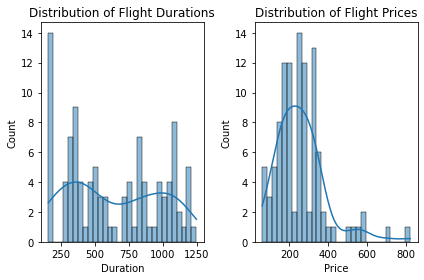

In [13]:
plt.subplot(1, 2, 1)
sns.histplot(df['Duration'], bins=30, kde=True)
plt.title('Distribution of Flight Durations')
plt.subplot(1, 2, 2)
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Flight Prices')
plt.tight_layout()
plt.show()

## Outliers

The box plots show that there are outliers in both 'Duration' and 'Price'. The outliers in 'Duration' are particularly extreme, which could suggest either very long flights or errors in data entry.
The outliers in 'Price' are less extreme but indicate that some tickets are significantly more expensive than others.

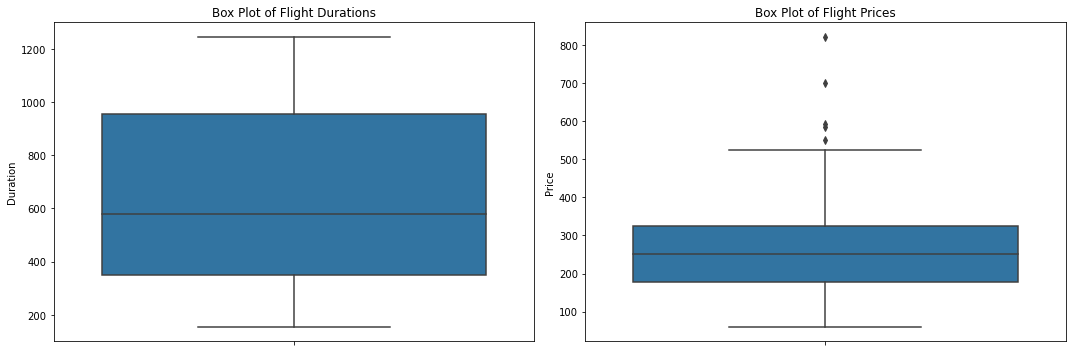

In [14]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Duration'])
plt.title('Box Plot of Flight Durations')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Price'])
plt.title('Box Plot of Flight Prices')
plt.tight_layout()
plt.show()

## Correlation

There appears to be a slight positive correlation between the number of stops and the price of a flight. This suggests that flights with more stops may be slightly more expensive.
Additionally, there is a weak positive correlation between the duration of a flight and its price, indicating that longer flights may tend to be more expensive.
As expected, there is a moderate positive correlation between the duration of a flight and the number of stops, since more stops generally result in longer flight durations.

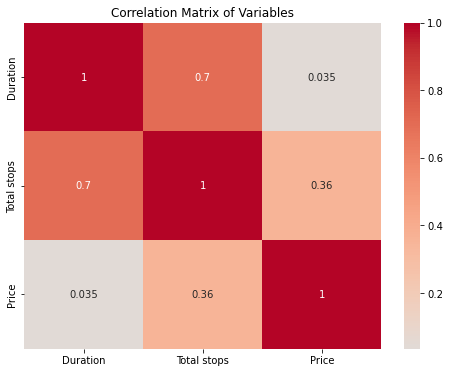

In [15]:
desc_stats = df.describe()
correlation_matrix=df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Variables')
plt.show()

In [16]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_percentage

Airline         0.0
Source          0.0
Destination     0.0
Duration        0.0
Total stops     0.0
Price           0.0
Date            0.0
Date scraped    0.0
dtype: float64

In [17]:
# Grouping by 'Airline', 'Source', 'Destination', and 'Date', then calculate the mean price
average_price_details = df.groupby(['Airline', 'Source', 'Destination', 'Date','Date scraped'])['Price'].mean()

# Sorting the results to find the cheapest combinations
cheapest_combinations = average_price_details.nsmallest(10)

print(cheapest_combinations)

Airline                 Source  Destination  Date        Date scraped
Iberia Express          MAD     DUB          15/12/2023  15/12/2023       60.000000
Vueling                 MAD     DUB          15/12/2023  15/12/2023       71.000000
                        DUB     IBZ          15/12/2023  15/12/2023       98.333333
Aer Lingus              MAD     DUB          15/12/2023  15/12/2023      121.000000
Iberia                  MAD     DUB          15/12/2023  15/12/2023      129.333333
Aer Lingus, Air Europa  DUB     MAD          15/12/2023  15/12/2023      131.000000
Vueling                 DUB     MAD          15/12/2023  15/12/2023      137.000000
Air France              MAD     DUB          15/12/2023  15/12/2023      142.000000
Vueling                 IBZ     DUB          15/12/2023  15/12/2023      149.500000
                        TFN     DUB          15/12/2023  15/12/2023      151.000000
Name: Price, dtype: float64


## Data transformation

In [18]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date scraped'] = pd.to_datetime(df['Date scraped'], errors='coerce')

In [19]:
# One-hot encoding of the 'Airline' column
df = pd.get_dummies(df, columns=['Source','Destination'])

# Displaying the first few rows of the newly encoded DataFrame
df.head()

Airline  Duration  Total stops  Price       Date Date scraped  \
0              Vueling       380            1    127 2023-12-15   2023-12-15   
1              Vueling      1065            1     84 2023-12-15   2023-12-15   
2  Aer Lingus, Vueling       305            1    276 2023-12-15   2023-12-15   
3               Iberia       750            1    140 2023-12-15   2023-12-15   
4              Vueling      1245            1     84 2023-12-15   2023-12-15   

   Source_DUB  Source_IBZ  Source_MAD  Source_TFN  Destination_DUB  \
0           1           0           0           0                0   
1           1           0           0           0                0   
2           1           0           0           0                0   
3           1           0           0           0                0   
4           1           0           0           0                0   

   Destination_IBZ  Destination_MAD  Destination_TFN  
0                1                0                0  
1                1                0                0  
2                1                0                0  
3                1                0                0  
4                1                0                0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          105 non-null    object        
 1   Duration         105 non-null    int64         
 2   Total stops      105 non-null    int32         
 3   Price            105 non-null    int32         
 4   Date             105 non-null    datetime64[ns]
 5   Date scraped     104 non-null    datetime64[ns]
 6   Source_DUB       105 non-null    uint8         
 7   Source_IBZ       105 non-null    uint8         
 8   Source_MAD       105 non-null    uint8         
 9   Source_TFN       105 non-null    uint8         
 10  Destination_DUB  105 non-null    uint8         
 11  Destination_IBZ  105 non-null    uint8         
 12  Destination_MAD  105 non-null    uint8         
 13  Destination_TFN  105 non-null    uint8         
dtypes: datetime64[ns](2), int32(2), int64(1), 

In [21]:
# Dropping rows with any missing values
df = df.dropna()

# Checking the shape of the new DataFrame to see how many rows were dropped
print("Original DataFrame shape:", df.shape)
print("New DataFrame shape:", df.shape)

Original DataFrame shape: (104, 14)
New DataFrame shape: (104, 14)


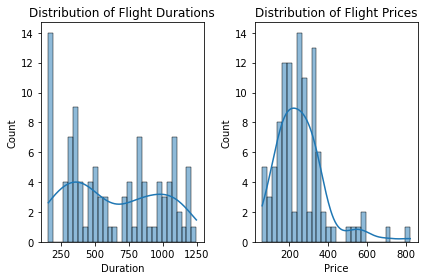

In [22]:
plt.subplot(1, 2, 1)
sns.histplot(df['Duration'], bins=30, kde=True)
plt.title('Distribution of Flight Durations')
plt.subplot(1, 2, 2)
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Flight Prices')
plt.tight_layout()
plt.show()

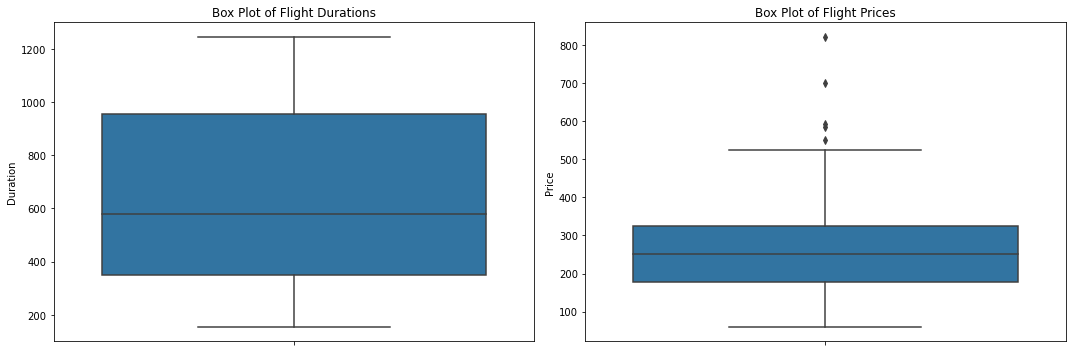

In [23]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Duration'])
plt.title('Box Plot of Flight Durations')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Price'])
plt.title('Box Plot of Flight Prices')
plt.tight_layout()
plt.show()

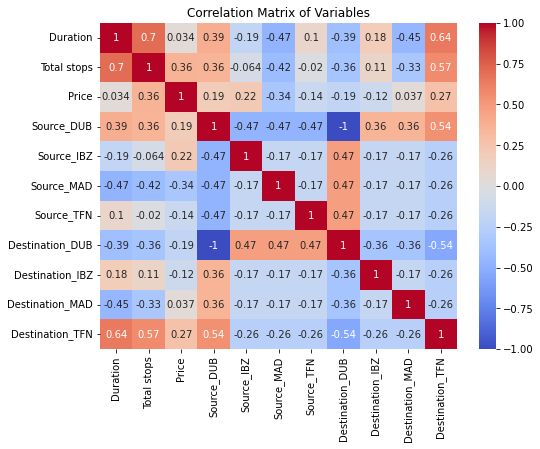

In [24]:
desc_stats = df.describe()
correlation_matrix=df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Variables')
plt.show()

## EDA - PRICE

In [25]:
mean_price = df['Price'].mean()
print("Mean price:", mean_price)

Mean price: 258.11538461538464


In [26]:
# Grouping by day and calculate mean price
average_price_by_day = df.groupby(df['Date'].dt.date)['Price'].mean()

# Finding the day(s) with the lowest average price
cheapest_days = average_price_by_day.idxmin()
cheapest_price = average_price_by_day.min()

print("Cheapest days to fly:", cheapest_days)
print("Price on the cheapest day:", cheapest_price)

Cheapest days to fly: 2023-12-15
Price on the cheapest day: 258.11538461538464


In [27]:
output_file_path = r'C:\Users\eduma\OneDrive\Escritorio\Folders_Links\Formation\CTT COLLEGUE Programming Bootcamp Sept2023\StratThink_HDipData&AI_Sept23_HCI\CA 2 - GitLab\ca2stratthinking\targeted_cleaned_data.csv'
df.to_csv(output_file_path, index=False)